In [1]:
# 데이터로더 생성을 위한 라이브러리 불러오기
from mmcv.utils import Config
from mmseg.datasets import build_dataset, build_dataloader
import matplotlib.pyplot as plt
import torch

/opt/conda/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


2022-12-29 12:30:57,700 - mmseg - INFO - Loaded 2617 images
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


start
start
start
start


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


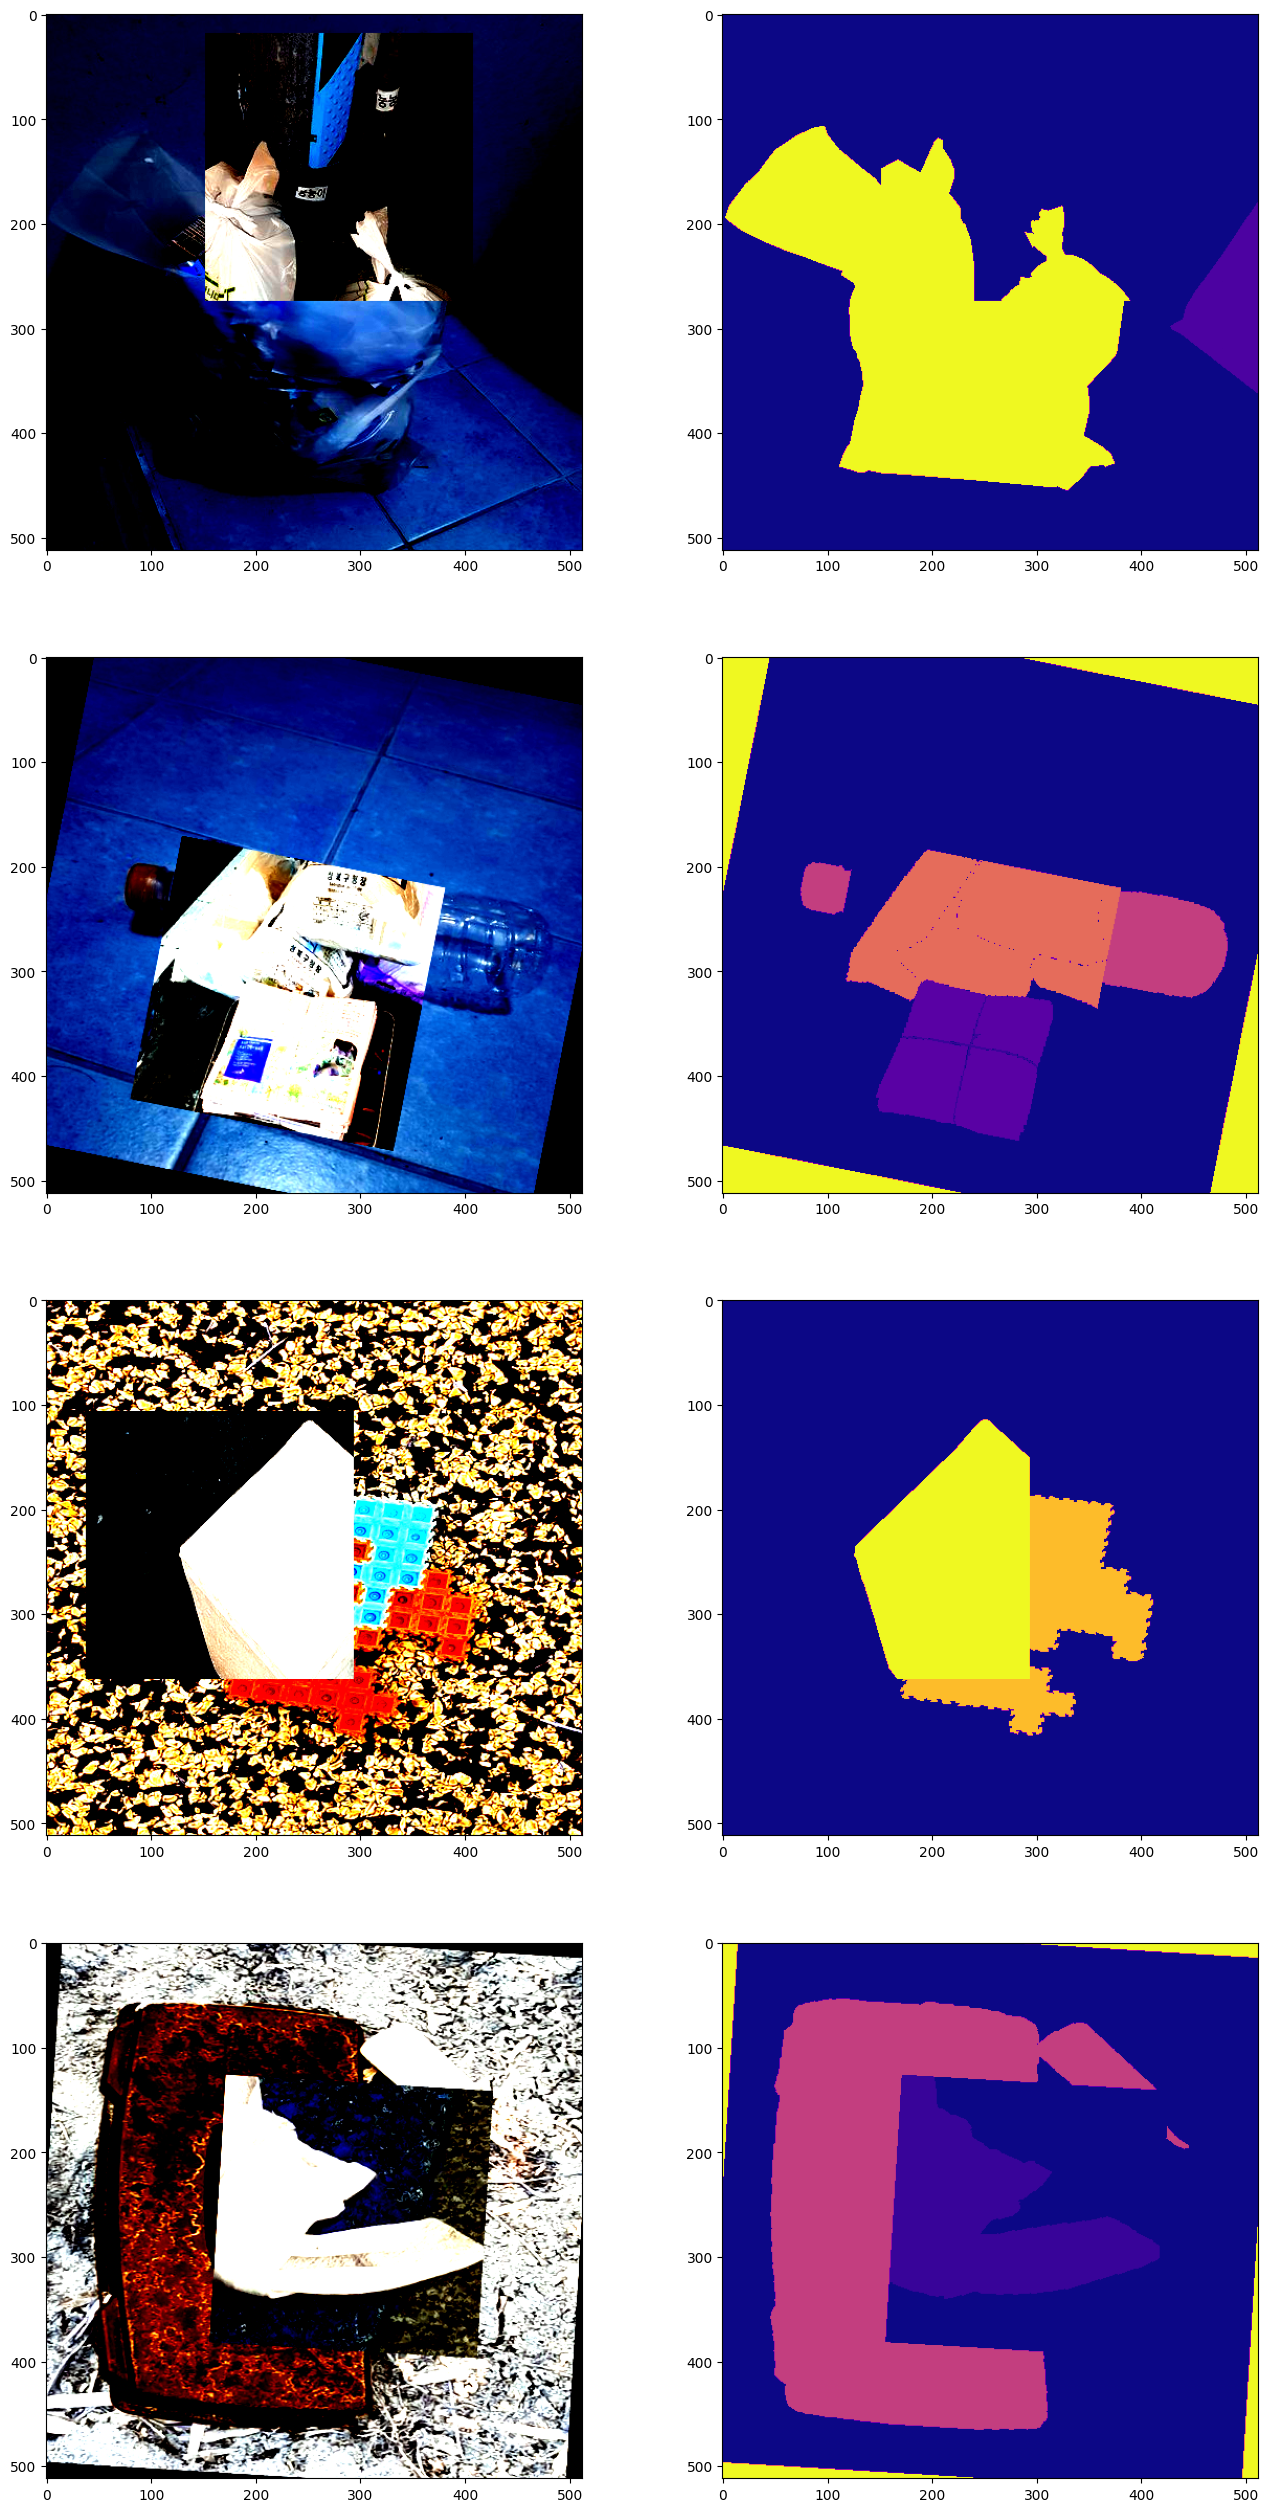

In [3]:
## ver.train
# config file 불러오기 _ datasets 부분
# how_much : 처음 몇개를 볼 것인가?
config_file = '/opt/ml/level2_semanticsegmentation_cv-level2-cv-03/CV03/configs/Augmentation/Aug_Cmx.py'
how_much = 4

# config를 cfg로 관리 & 데이터셋 생성
cfg = Config.fromfile(config_file)
datasets = build_dataset(cfg.data.train)

# 초기 8개 이미지를 mask와 함께 한번에 관찰
fig = plt.figure(figsize=(16, 16*(how_much/2)))
for idx, val in enumerate(datasets):
    ax1 = fig.add_subplot(how_much, 2, 2*idx+1)
    img = val['img']._data.permute(1, 2, 0)
    img_rgb = torch.stack([img[:, :, 2], img[:, :, 1], img[:, :, 0]], dim=2)
    ax1.imshow(img_rgb)
    
    ax2 = fig.add_subplot(how_much, 2, 2*idx+2)
    mask = torch.clamp(val['gt_semantic_seg']._data.permute(1, 2, 0)*20, max=255)
    ax2.imshow(mask, cmap='plasma')
    
    if idx == how_much-1:
        break

plt.show()

2022-12-28 19:23:20,120 - mmseg - INFO - Loaded 655 images


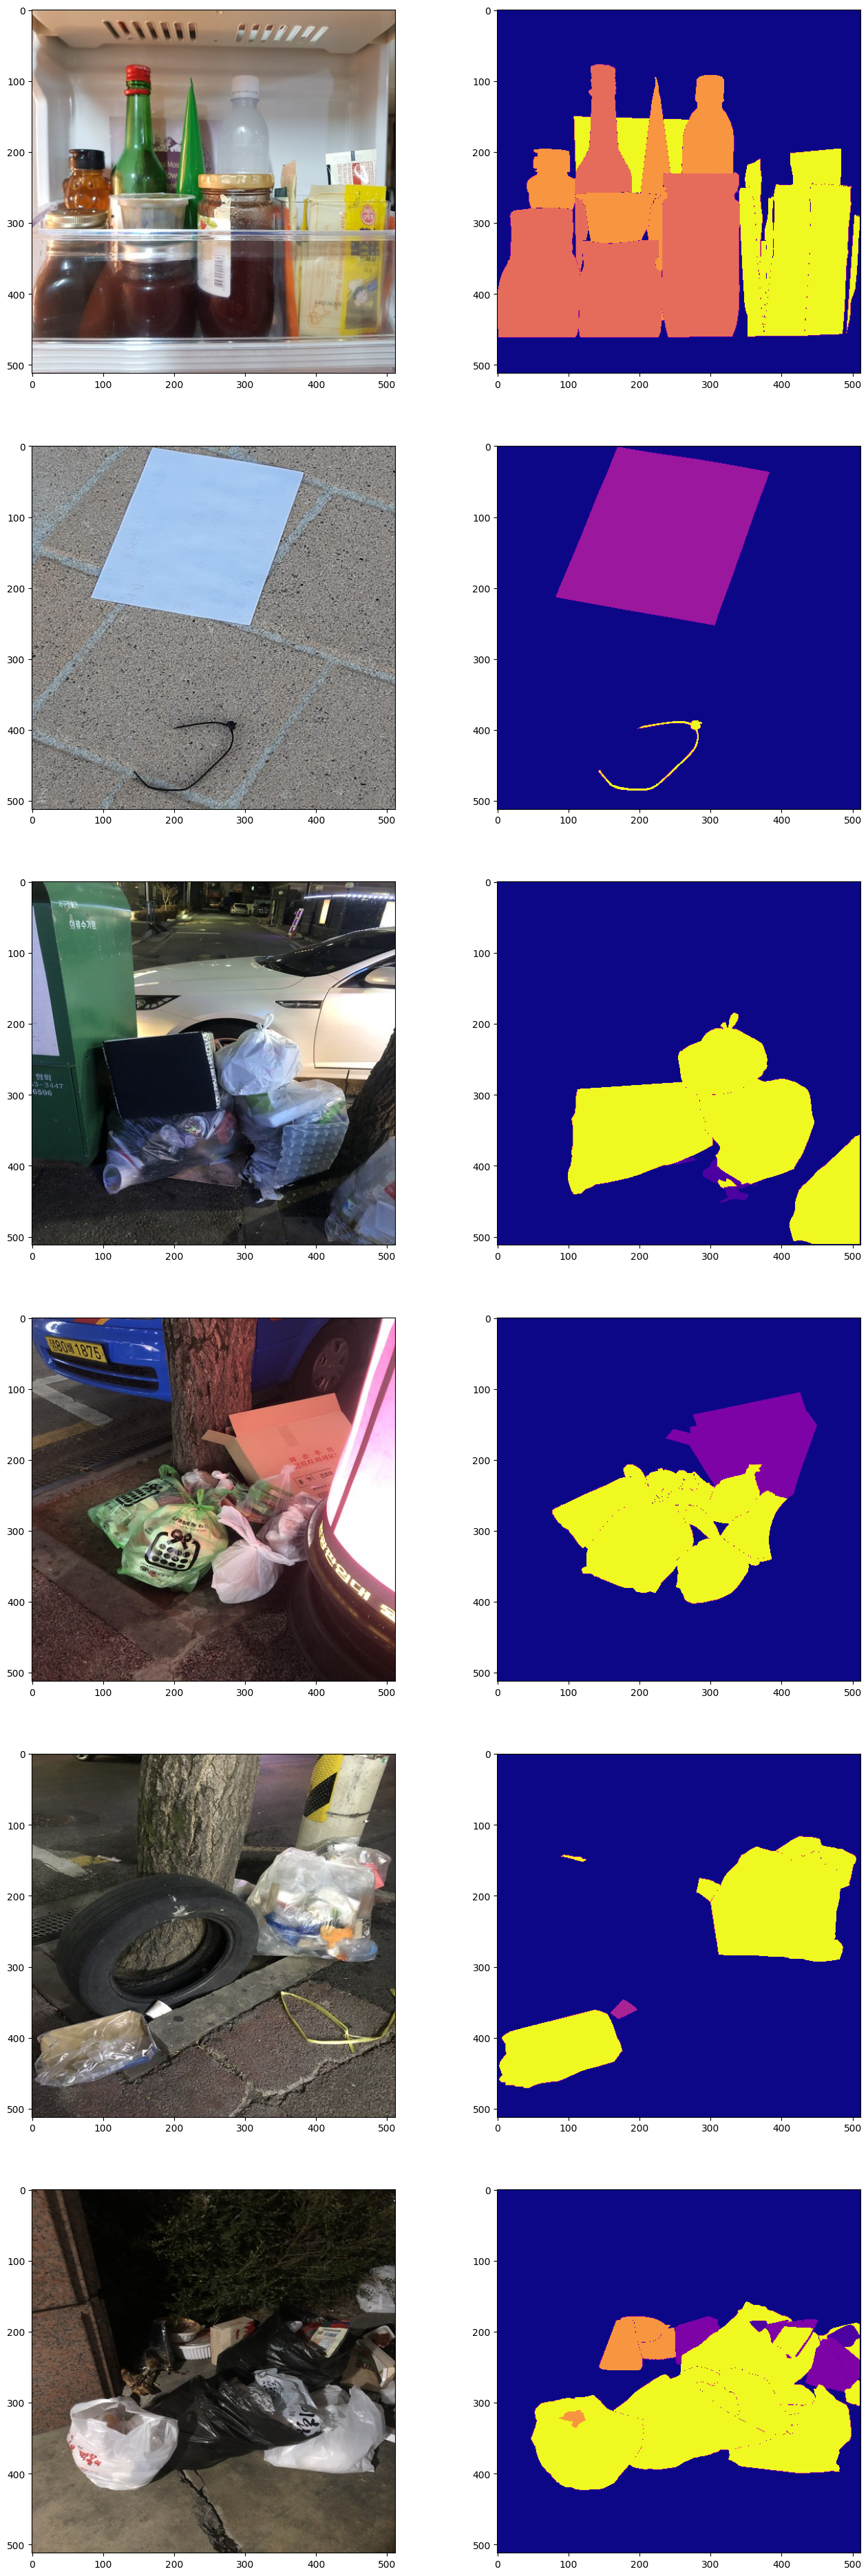

In [68]:
## ver.valid
# config file 불러오기 _ datasets 부분
# how_much : 처음 몇개를 볼 것인가?
config_file = '/opt/ml/level2_semanticsegmentation_cv-level2-cv-03/CV03/configs/Augmentation/Aug_NCp384Cla.py'
how_much = 6

# config를 cfg로 관리 & 데이터셋 생성
cfg = Config.fromfile(config_file)

valid_pipeline = [
    dict(type="LoadImageFromFile"),
    dict(type="LoadAnnotations"),
    dict(type="RandomFlip", prob=0),
    dict(type="DefaultFormatBundle"),
    dict(type="Collect", keys=["img", "gt_semantic_seg"]),
]
cfg.data.val.pipeline = valid_pipeline
datasets = build_dataset(cfg.data.val)


# 초기 8개 이미지를 mask와 함께 한번에 관찰
fig = plt.figure(figsize=(16, 16*(how_much/2)))
for idx, val in enumerate(datasets):
    ax1 = fig.add_subplot(how_much, 2, 2*idx+1)
    img = val['img']._data.permute(1, 2, 0)
    img_rgb = torch.stack([img[:, :, 2], img[:, :, 1], img[:, :, 0]], dim=2)
    ax1.imshow(img_rgb)
    
    ax2 = fig.add_subplot(how_much, 2, 2*idx+2)
    mask = torch.clamp(val['gt_semantic_seg']._data.permute(1, 2, 0)*20, max=255)
    ax2.imshow(mask, cmap='plasma')
    
    if idx == how_much-1:
        break

plt.show()